In [1]:
import pandas as pd
import numpy as np

bank = pd.read_csv('./datasets/bank.csv')

loan = pd.read_csv('./datasets/loan.csv', dtype=str)  # 열의 데이터 유형을 문자열로 설정


# Customer id: 고객을 식별하는 고유한 식별자입니다.
# age: 고객의 나이입니다.
# salary: 고객의 월별 급여입니다.
# balance: 고객의 은행 계좌 잔액입니다.
# marital: 고객의 혼인 상태입니다.
# jobedu: 고객의 직업 및 교육 수준에 대한 정보입니다.
# default: 고객의 대출 기본 여부입니다.
# housing: 고객의 주택 대출 여부입니다.
# loan: 고객의 개인 대출 여부입니다.

In [2]:
bank.drop(['contact','day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'response', 'targeted' ], axis=1, inplace=True)


In [3]:
# bank['salary'] = (bank['salary'] / 12).fillna(0).astype(int)
# bank

In [4]:
# bank 데이터프레임을 복사하여 수정
bank = bank.copy()

# 'marital' 열의 'divorced' 값을 'single'로 대체
bank['marital'].replace({'divorced': 'single'}, inplace=True)

# 결측치가 있는 행 삭제
bank = bank.dropna()

# 'jobedu' 열을 ','를 기준으로 나누어 'job'과 'class' 열 생성
bank[['job', 'class']] = bank['jobedu'].str.split(',', expand=True)

# 'jobedu' 열 삭제
bank.drop(columns=['jobedu'], inplace=True)

# 'job' 열 값 변경
job_mapping = {'blue-collar': 'blue', 'technician': 'blue', 'management': 'white', 'admin.': 'white', 'entrepreneur': 'white', 'self-employed': 'white', 'retired': 'no', 'services': 'pink', 'unemployed': 'no', 'housemaid': 'no', 'student': 'no'}
bank['job'].replace(job_mapping, inplace=True)

# 'class' 열이 'unknown'인 행 제거
bank = bank[bank['class'] != 'unknown']

# 'job' 열이 'unknown'인 행 제거
bank = bank[bank['job'] != 'unknown']

# 수정된 데이터프레임 출력
bank


,customerid,age,salary,balance,marital,default,housing,loan,job,class
0,1.0,58.0,100000.0,2143.0,married,no,yes,no,white,tertiary
1,2.0,44.0,60000.0,29.0,single,no,yes,no,blue,secondary
2,3.0,33.0,120000.0,2.0,married,no,yes,yes,white,secondary
5,6.0,35.0,100000.0,231.0,married,no,yes,no,white,tertiary
6,7.0,28.0,100000.0,447.0,single,no,yes,yes,white,tertiary
...,...,...,...,...,...,...,...,...,...,...
45206,45207.0,51.0,60000.0,825.0,married,no,no,no,blue,tertiary
45209,45208.0,71.0,55000.0,1729.0,single,no,no,no,no,primary
45210,45209.0,72.0,55000.0,5715.0,married,no,no,no,no,secondary
45211,45210.0,57.0,20000.0,668.0,married,no,no,no,blue,secondary


In [5]:
# 각 고객의 나이대를 할당하는 함수
def assign_age_group(age):
    if 10 <= age <= 29:
        return '20'
    elif 30 <= age <= 39:
        return '30'
    elif 40 <= age <= 49:
        return '40'
    elif 50 <= age <= 59:
        return '50'
    elif 60 <= age <= 69:
        return '60'
    elif 70 <= age <= 79:
        return '70'
    elif 80 <= age <= 89:
        return '80'
    elif 90 <= age <= 99:
        return '90'
    # 이하 생략 (나머지 나이대에 대해서도 동일한 방식으로 처리)

# 'AgeGroup' 열 추가
bank['AgeGroup'] = bank['age'].apply(assign_age_group)
bank

,customerid,age,salary,balance,marital,default,housing,loan,job,class,AgeGroup
0,1.0,58.0,100000.0,2143.0,married,no,yes,no,white,tertiary,50
1,2.0,44.0,60000.0,29.0,single,no,yes,no,blue,secondary,40
2,3.0,33.0,120000.0,2.0,married,no,yes,yes,white,secondary,30
5,6.0,35.0,100000.0,231.0,married,no,yes,no,white,tertiary,30
6,7.0,28.0,100000.0,447.0,single,no,yes,yes,white,tertiary,20
...,...,...,...,...,...,...,...,...,...,...,...
45206,45207.0,51.0,60000.0,825.0,married,no,no,no,blue,tertiary,50
45209,45208.0,71.0,55000.0,1729.0,single,no,no,no,no,primary,70
45210,45209.0,72.0,55000.0,5715.0,married,no,no,no,no,secondary,70
45211,45210.0,57.0,20000.0,668.0,married,no,no,no,blue,secondary,50


In [6]:
# # 'housing' 열 값이 'yes' 또는 'no' 인 행들만 필터링
# filtered_bank = bank[bank['housing'].isin(['yes', 'no'])]

# # 'housing'과 'AgeGroup' 열을 기준으로 그룹화하여 보여주기
# housing = filtered_bank.groupby(['housing', 'AgeGroup']).size().unstack()



In [7]:
bank = bank.sort_values(by='salary', ascending=False)


bank['balance'].max()

102127.0

In [8]:
bank['salary'].value_counts()
bank['salary'].mean()

57667.94061103004

In [9]:
# 'housing' 열의 값이 'yes'이고 'loan' 열의 값도 'yes'인 행을 필터링한 후, 'marital' 열을 기준으로 그룹화합니다.
grouped = bank[(bank['housing'] == 'yes') & (bank['loan'] == 'yes')].groupby('marital').size()

# 결과 출력
print(grouped)

marital
married    2916
single     1369
dtype: int64


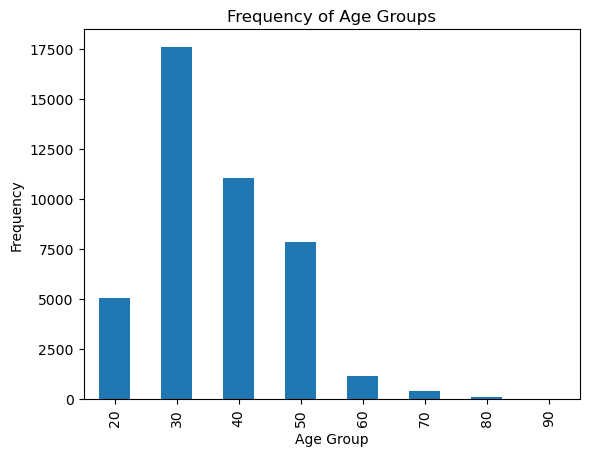

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# AgeGroup 별 빈도 계산
age_group_counts = bank['AgeGroup'].value_counts()

# 나이순으로 데이터 정렬
age_group_counts = age_group_counts.sort_index()

# 막대 그래프 생성
age_group_counts.plot(kind='bar')

# 그래프 제목과 축 이름 설정
plt.title('Frequency of Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Frequency')

# 그래프 출력
plt.show()


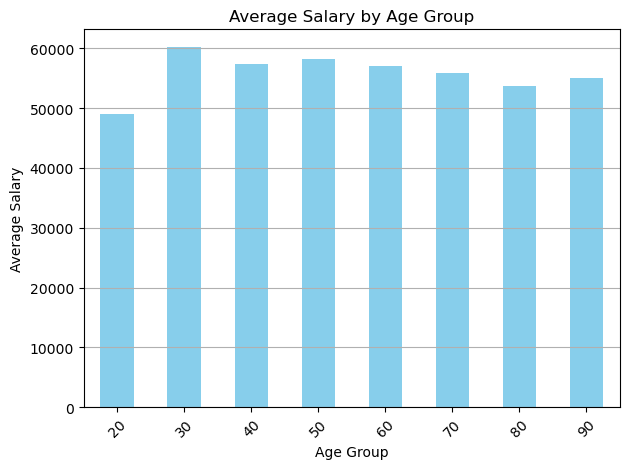

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# AgeGroup에 따라 데이터를 그룹화하고 'salary' 열의 평균을 계산합니다.
salary_by_age_group = bank.groupby('AgeGroup')['salary'].mean()

# 결과를 시각화합니다.
salary_by_age_group.plot(kind='bar', color='skyblue')
plt.title('Average Salary by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Salary')
plt.xticks(rotation=45)  # x축 레이블 회전
plt.grid(axis='y')  # y축 그리드 라인 표시
plt.tight_layout()  # 그래프 간격 조정
plt.show()


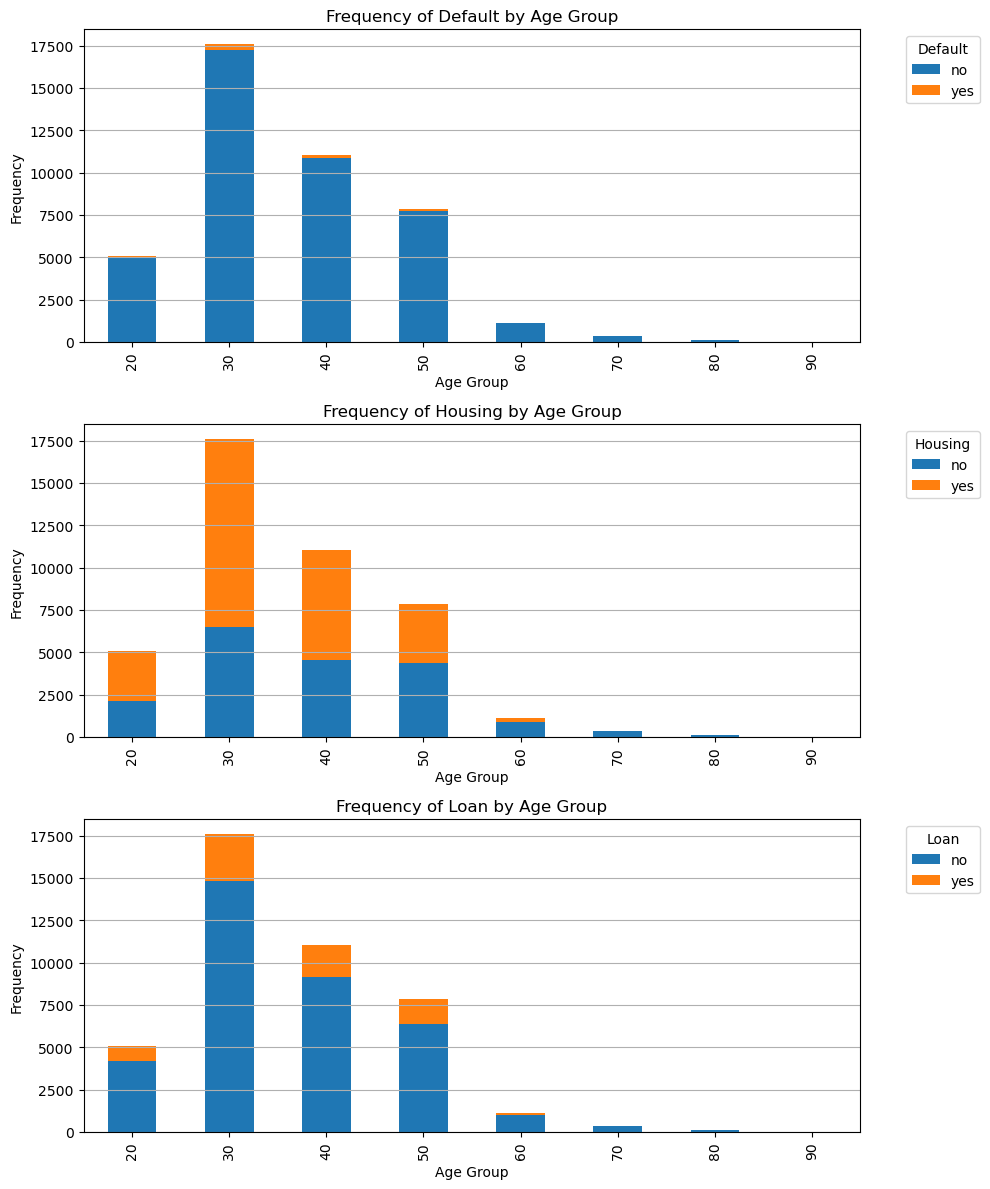

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# AgeGroup에 따라 데이터를 그룹화합니다.
grouped = bank.groupby('AgeGroup')

# 각 변수 별로 시각화를 위한 그래프 생성
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 12))

# default에 대한 시각화
default_counts = grouped['default'].value_counts().unstack().fillna(0)
default_counts.plot(kind='bar', stacked=True, ax=axes[0])
axes[0].set_title('Frequency of Default by Age Group')
axes[0].set_xlabel('Age Group')
axes[0].set_ylabel('Frequency')
axes[0].legend(title='Default', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0].grid(axis='y')

# housing에 대한 시각화
housing_counts = grouped['housing'].value_counts().unstack().fillna(0)
housing_counts.plot(kind='bar', stacked=True, ax=axes[1])
axes[1].set_title('Frequency of Housing by Age Group')
axes[1].set_xlabel('Age Group')
axes[1].set_ylabel('Frequency')
axes[1].legend(title='Housing', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1].grid(axis='y')

# loan에 대한 시각화
loan_counts = grouped['loan'].value_counts().unstack().fillna(0)
loan_counts.plot(kind='bar', stacked=True, ax=axes[2])
axes[2].set_title('Frequency of Loan by Age Group')
axes[2].set_xlabel('Age Group')
axes[2].set_ylabel('Frequency')
axes[2].legend(title='Loan', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[2].grid(axis='y')

# 그래프 간 간격 조정
plt.tight_layout()
plt.show()


In [13]:
# 집, 대출이 있는 사람중 매달 고소득을 이루고있지만 잔고가 음수인 사람들 - 
#  당장의 유동성 문제를 보이는 사람들 생활비 대출 해줄수 있습니다.  / 상위 티어로

housing_loan_yes = bank[(bank['housing'] == 'yes') & (bank['loan'] == 'yes')]
negative_balance_customers = housing_loan_yes[housing_loan_yes['balance'] < 0]
want = negative_balance_customers[negative_balance_customers['salary'] >= 6000]

want

,customerid,age,salary,balance,marital,default,housing,loan,job,class,AgeGroup
16000,16001.0,30.0,120000.0,-346.0,married,no,yes,yes,white,secondary,30
8286,8287.0,42.0,120000.0,-480.0,married,no,yes,yes,white,secondary,40
38898,38899.0,43.0,120000.0,-480.0,married,no,yes,yes,white,secondary,40
26956,26957.0,31.0,120000.0,-405.0,single,yes,yes,yes,white,tertiary,30
30014,30015.0,32.0,120000.0,-849.0,single,yes,yes,yes,white,primary,30
...,...,...,...,...,...,...,...,...,...,...,...
26447,26448.0,36.0,8000.0,-872.0,married,no,yes,yes,no,secondary,30
17753,17754.0,43.0,8000.0,-7.0,married,no,yes,yes,no,tertiary,40
12476,12477.0,45.0,8000.0,-249.0,single,yes,yes,yes,no,primary,40
1798,1799.0,33.0,8000.0,-131.0,married,no,yes,yes,no,secondary,30


In [14]:
housing_loan_yes = bank[(bank['housing'] == 'yes') & (bank['loan'] == 'no')]
# negative_balance_customers = housing_loan_yes[housing_loan_yes['balance'] < 0]
# want = negative_balance_customers[negative_balance_customers['salary'] >= 6000]
housing_loan_yes

,customerid,age,salary,balance,marital,default,housing,loan,job,class,AgeGroup
35855,35856.0,50.0,120000.0,300.0,married,no,yes,no,white,primary,50
35630,35631.0,42.0,120000.0,319.0,married,no,yes,no,white,primary,40
2308,2309.0,41.0,120000.0,171.0,married,no,yes,no,white,tertiary,40
35714,35715.0,38.0,120000.0,350.0,married,no,yes,no,white,primary,30
7702,7703.0,41.0,120000.0,740.0,married,no,yes,no,white,primary,40
...,...,...,...,...,...,...,...,...,...,...,...
31845,31846.0,24.0,4000.0,745.0,single,no,yes,no,no,secondary,20
38881,38882.0,26.0,4000.0,251.0,single,no,yes,no,no,tertiary,20
44385,44386.0,29.0,4000.0,1377.0,single,no,yes,no,no,secondary,20
1757,1758.0,23.0,4000.0,318.0,single,no,yes,no,no,secondary,20


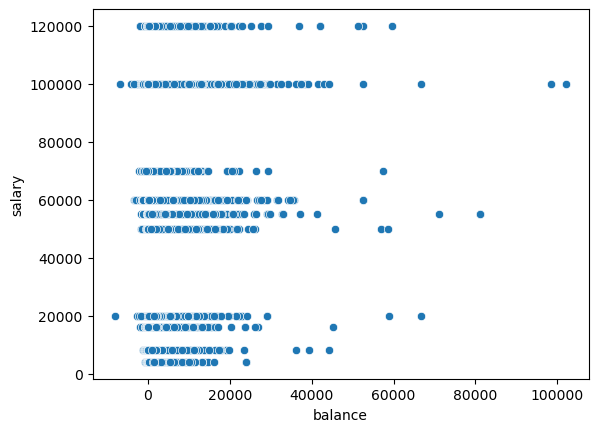

In [15]:
### import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x='balance', y='salary', data=bank)
plt.show()

In [16]:
bank['salary'].mean()

57667.94061103004

In [17]:
bank['balance'].mean()

1354.1914854191277

In [18]:
selected_columns = ['loan_amnt', 'term', 'int_rate', 'installment', 
                    'grade', 'home_ownership', 'annual_inc', 
                     'loan_status',
                     'purpose']

loan = loan[selected_columns]
loan

# loan_amnt: 대출 금액입니다.
# funded_amnt: 실제로 고객에게 대출된 금액입니다.
# term: 대출 기간입니다.
# int_rate: 대출 이자율입니다.
# installment: 대출 상환할 월별 분할금입니다.
# grade: 대출 등급입니다.
# emp_title: 고객의 직장 제목입니다.
# home_ownership: 주택 소유 형태입니다.
# annual_inc: 고객의 연간 소득입니다.
# verification_status: 소득 및 고용 정보 확인 여부입니다.
# loan_status: 대출 상태입니다.
# pymnt_plan: 대출 상환 계획입니다.
# purpose: 대출 목적입니다.
# title: 대출 제목입니다.



,loan_amnt,term,int_rate,installment,grade,home_ownership,annual_inc,loan_status,purpose
0,5000.0,36 months,10.65,162.87,B,RENT,24000.0,Fully Paid,credit_card
1,2500.0,60 months,15.27,59.83,C,RENT,30000.0,Charged Off,car
2,2400.0,36 months,15.96,84.33,C,RENT,12252.0,Fully Paid,small_business
3,10000.0,36 months,13.49,339.31,C,RENT,49200.0,Fully Paid,other
4,3000.0,60 months,12.69,67.79,B,RENT,80000.0,Current,other
...,...,...,...,...,...,...,...,...,...
887374,10000.0,36 months,11.99,332.1,B,RENT,31000.0,Current,debt_consolidation
887375,24000.0,36 months,11.99,797.03,B,MORTGAGE,79000.0,Current,home_improvement
887376,13000.0,60 months,15.99,316.07,D,RENT,35000.0,Current,debt_consolidation
887377,12000.0,60 months,19.99,317.86,E,RENT,64400.0,Current,debt_consolidation


In [19]:
loan = loan[loan['purpose'] != 'other']
loan = loan[loan['home_ownership'] != 'ANY']
loan = loan[loan['home_ownership'] != 'NONE']
loan = loan[loan['home_ownership'] != 'OTHER']
loan['term'].replace({' 36 months': '3y', ' 60 months': '5y'}, inplace=True)

In [20]:
loan['purpose'].replace({'debt_consolidation': 'debt',
                   'credit_card': 'debt',
                   'home_improvement': 'home',
                   'major_purchase': 'person',
                   'small_business': 'business',
                   'car': 'person',
                   'medical': 'medical',
                   'moving': 'home',
                   'vacation': 'person',
                   'house': 'home',
                   'wedding': 'person','renewable_energy': 'business','educational': 'person'}, inplace=True)

In [21]:
loan['loan_status'].replace({'Late (31-120 days)': 'Late',
                   'Late (16-30 days)': 'Late',
                   'In Grace Period': 'Late',
                   'Does not meet the credit policy. Status:Fully Paid': 'Fully Paid',
                   'Does not meet the credit policy. Status:Charged Off': 'Charged Off',}, inplace=True)
loan = loan[loan['loan_status'] != 'Default']
loan = loan[loan['loan_status'] != 'Issued']

loan.loc[:,'annual_inc'] = loan['annual_inc'].astype(str).str.replace('.', '').astype(int)
loan.loc[:,'loan_amnt'] = loan['loan_amnt'].astype(str).str.replace('.', '').astype(int)
loan.loc[:,'int_rate'] = loan['int_rate'].str.rstrip('%').astype(float)
loan.loc[:,'installment'] = loan['installment'].astype(str).str.replace('.', '').astype(float)

In [22]:
loan['loan_status'].value_counts()

loan_status
Current        575166
Fully Paid     197907
Charged Off     42911
Late            19160
Name: count, dtype: int64

In [23]:
loan.groupby('loan_status')['loan_amnt'].mean()

loan_status
Charged Off    147909.224907
Current        154757.658659
Fully Paid     135555.153431
Late            159657.43737
Name: loan_amnt, dtype: object

In [24]:
loan.groupby('loan_status')['annual_inc'].mean()

loan_status
Charged Off    697847.019808
Current        798304.366564
Fully Paid     782894.987135
Late           764922.261952
Name: annual_inc, dtype: object

In [25]:
loan.groupby('purpose')['loan_status'].value_counts()


purpose   loan_status
business  Current          5302
          Fully Paid       3668
          Charged Off      1494
          Late              336
debt      Current        506068
          Fully Paid     163981
          Charged Off     35755
          Late            16554
home      Current         39955
          Fully Paid      15819
          Charged Off      3073
          Late             1435
medical   Current          5324
          Fully Paid       2316
          Charged Off       591
          Late              198
person    Current         18517
          Fully Paid      12123
          Charged Off      1998
          Late              637
Name: count, dtype: int64

In [26]:
loan.groupby('loan_status')['installment'].mean()
# loan['installment'].max()

# installment이 40000을 초과하는 행을 필터링합니다.
filtered_data = loan[loan['installment'] > 40000]

# loan_status 열의 값의 수를 계산합니다.
value_counts = filtered_data['loan_status'].value_counts()

value_counts

loan['installment'].mean()


40261.160668100354

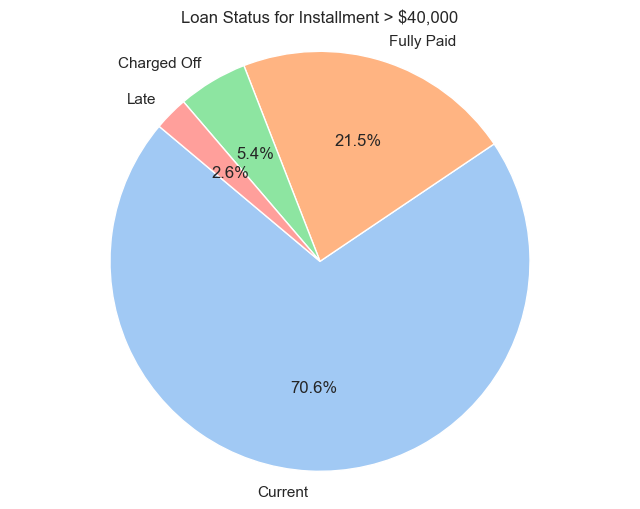

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# installment이 40000을 초과하는 행을 필터링합니다.
filtered_data = loan[loan['installment'] > 50000]
# filtered_data = loan['installment']
# loan_status 열의 값의 수를 계산합니다.
value_counts = filtered_data['loan_status'].value_counts()

# Seaborn을 사용하여 원 그래프를 그립니다.
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Loan Status for Installment > $40,000')
plt.show()


In [28]:
df = pd.DataFrame(loan)

# 'purpose'가 'business'인 행들만 필터링
business_loans = df[df['loan_status'] == 'Charged Off']
# business_loans = df[(df['loan_status'] == 'Charged Off') & (df['installment'] <= 50000)]

business_loans['int_rate'].mean()
# loan['int_rate'].mean()

15.920003262565029

In [29]:
loan.groupby('loan_status')['annual_inc'].mean()

loan_status
Charged Off    697847.019808
Current        798304.366564
Fully Paid     782894.987135
Late           764922.261952
Name: annual_inc, dtype: object

In [30]:
df = pd.DataFrame(loan)

# 'purpose'가 'business'인 행들만 필터링
asd = df[df['purpose'] == 'debt']

# 결과 출력
# asd['annual_inc'].mean()
asd['loan_amnt'].mean()
# asd
loan['loan_amnt'].mean()

149967.70197714405

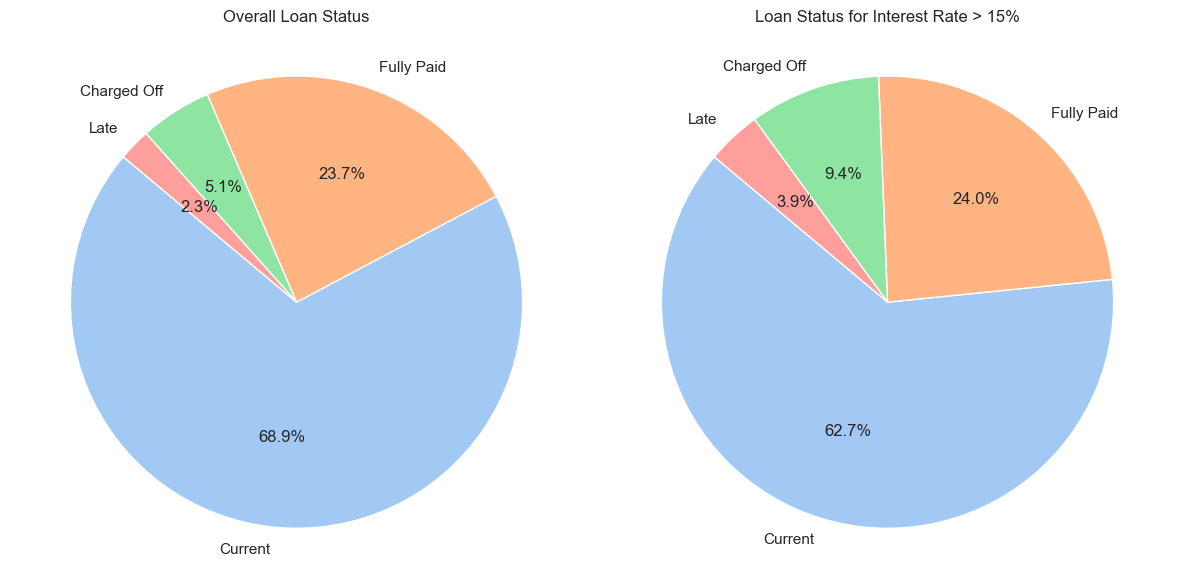

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# 전체 대출 상태의 비율 계산
total_value_counts = loan['loan_status'].value_counts()

# int_rate이 15를 초과하는 행을 선택
filtered_data = loan[loan['int_rate'] > 15]

# int_rate이 15를 초과하는 대출 상태의 비율 계산
filtered_value_counts = filtered_data['loan_status'].value_counts()

# 전체 대출 상태 비율을 원 그래프로 표시
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.pie(total_value_counts, labels=total_value_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.axis('equal')
plt.title('Overall Loan Status')

# int_rate이 15를 초과하는 대출 상태 비율을 원 그래프로 표시
plt.subplot(1, 2, 2)
plt.pie(filtered_value_counts, labels=filtered_value_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.axis('equal')
plt.title('Loan Status for Interest Rate > 15%')

plt.tight_layout()
plt.show()


In [32]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # 전체 대출 상태의 비율 계산
# total_value_counts = loan['annual_inc'].value_counts()

# # int_rate이 15를 초과하는 행을 선택
# filtered_data = loan[loan['annual_inc'] > 710000]

# # int_rate이 15를 초과하는 대출 상태의 비율 계산
# filtered_value_counts = filtered_data['annual_inc'].value_counts()

# # 전체 대출 상태 비율을 원 그래프로 표시
# plt.figure(figsize=(12, 6))
# plt.subplot(1, 2, 1)
# plt.pie(total_value_counts, labels=total_value_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
# plt.axis('equal')
# plt.title('Overall Loan Status')

# # int_rate이 15를 초과하는 대출 상태 비율을 원 그래프로 표시
# plt.subplot(1, 2, 2)
# plt.pie(filtered_value_counts, labels=filtered_value_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
# plt.axis('equal')
# plt.title('Loan Status for Interest Rate > 15%')

# plt.tight_layout()
# plt.show()


In [33]:
de_data = filtered_data[filtered_data['loan_status'] == 'Charged Off']
de_data.annual_inc.mean()
# loan.annual_inc.mean()

713236.011803686

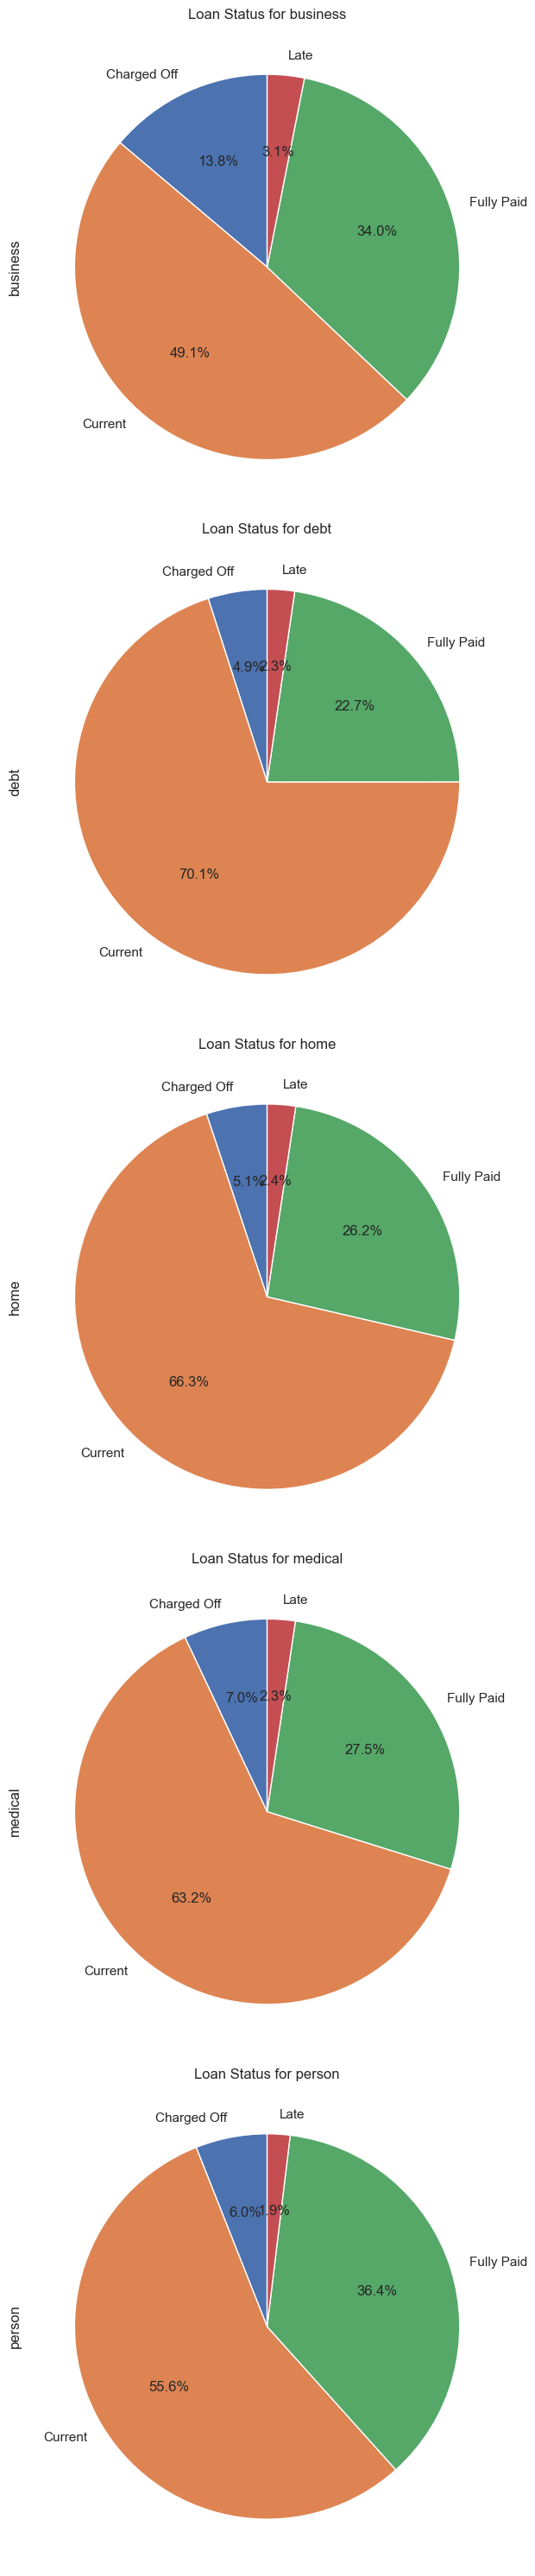

In [34]:
## import pandas as pd
import matplotlib.pyplot as plt

# 데이터프레임 생성
df = pd.DataFrame(loan)

# 대출 목적(purpose)별 대출 상태(loan_status)의 개수 계산
grouped_data = df.groupby(['purpose', 'loan_status']).size().unstack(fill_value=0)

# 그래프 그리기
fig, axes = plt.subplots(nrows=len(grouped_data), ncols=1, figsize=(10, 6 * len(grouped_data)))

for i, (purpose, data) in enumerate(grouped_data.iterrows()):
    ax = axes[i]
    data.plot(kind='pie', ax=ax, autopct='%1.1f%%', startangle=90)
    ax.set_title(f'Loan Status for {purpose}')

plt.tight_layout()
plt.show()


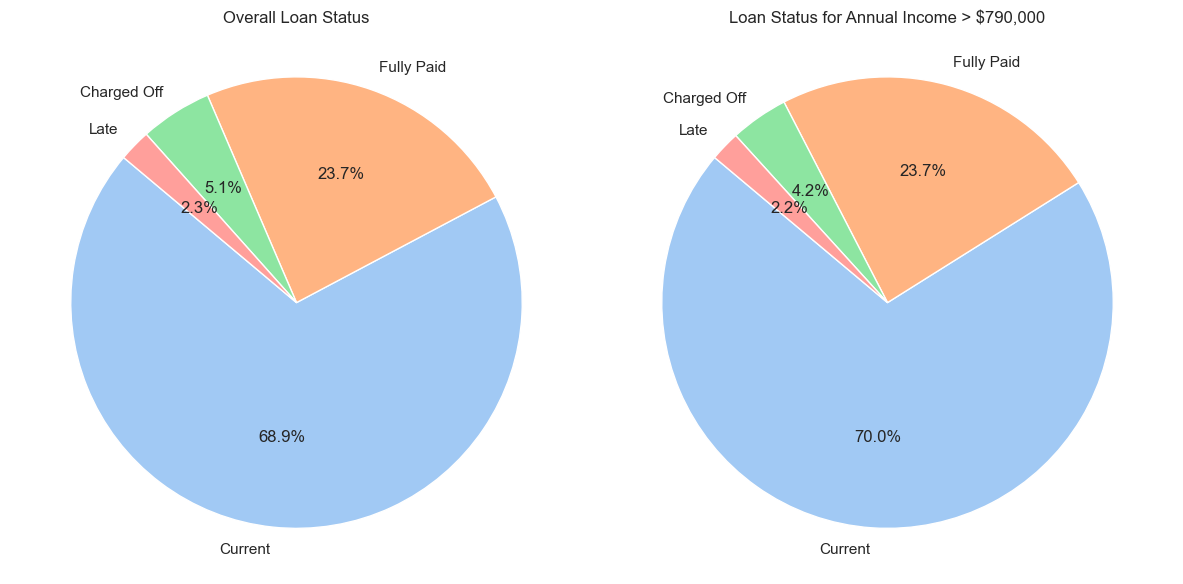

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# 전체 대출 상태의 비율 계산
total_value_counts = loan['loan_status'].value_counts()

# 'annual_inc'이 790,000을 초과하는 행을 선택
filtered_data = loan[loan['annual_inc'] > 600000]

# 'annual_inc'이 790,000을 초과하는 대출 상태의 비율 계산
filtered_value_counts = filtered_data['loan_status'].value_counts()

# 전체 대출 상태 비율을 원 그래프로 표시
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.pie(total_value_counts, labels=total_value_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.axis('equal')
plt.title('Overall Loan Status')

# 'annual_inc'이 790,000을 초과하는 대출 상태의 비율을 원 그래프로 표시
plt.subplot(1, 2, 2)
plt.pie(filtered_value_counts, labels=filtered_value_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.axis('equal')
plt.title('Loan Status for Annual Income > $790,000')

plt.tight_layout()
plt.show()


In [36]:
# import matplotlib.pyplot as plt

# # 'purpose' 열의 값 카운트
# value_counts = loan['purpose'].value_counts()

# # 파이 그래프 그리기
# plt.figure(figsize=(8, 8))
# plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
# plt.axis('equal')  # 원이 원형이 되도록 설정
# plt.title('Loan Purpose Distribution')
# plt.show()


In [37]:
# # 'purpose' 열을 기준으로 데이터를 그룹화하고 'loan_amnt' 열의 값을 합산합니다.
# purpose_loan_amount_sum = loan.groupby('purpose')['loan_amnt'].sum()

# # 결과 출력
# print(purpose_loan_amount_sum)


In [38]:
# import pandas as pd
# filtered_df = loan[loan['loan_status'].isin(['Charged Off', 'Late'])]

# filtered_df.sort_values(by='annual_inc', ascending=False)
# # 'annual_inc' 열의 값을 문자열로 변환 후 소수점 제거 및 정수로 변환
# filtered_df['annual_inc'] = filtered_df['annual_inc'].astype(str).str.replace('.', '').astype(int)

# filtered_df['annual_inc'].mean()
# filtered_df

In [39]:
# import pandas as pd
# a = loan[loan['loan_status'].isin(['Current', 'Late'])]

# a.sort_values(by='annual_inc', ascending=False)
# # 'annual_inc' 열의 값을 문자열로 변환 후 소수점 제거 및 정수로 변환
# a['annual_inc'] = a['annual_inc'].astype(str).str.replace('.', '').astype(int)

# a['annual_inc'].mean()
# # a

In [40]:
# import pandas as pd
# a = loan[loan['loan_status'].isin(['Fully Paid', 'Late'])]

# a.sort_values(by='annual_inc', ascending=False)
# # 'annual_inc' 열의 값을 문자열로 변환 후 소수점 제거 및 정수로 변환
# a['annual_inc'] = a['annual_inc'].astype(str).str.replace('.', '').astype(int)

# a['annual_inc'].mean()
# a

In [41]:
loan.groupby('loan_status')['home_ownership'].value_counts()
loan.groupby('loan_status')['purpose'].value_counts()


loan_status  purpose 
Charged Off  debt         35755
             home          3073
             person        1998
             business      1494
             medical        591
Current      debt        506068
             home         39955
             person       18517
             medical       5324
             business      5302
Fully Paid   debt        163981
             home         15819
             person       12123
             business      3668
             medical       2316
Late         debt         16554
             home          1435
             person         637
             business       336
             medical        198
Name: count, dtype: int64

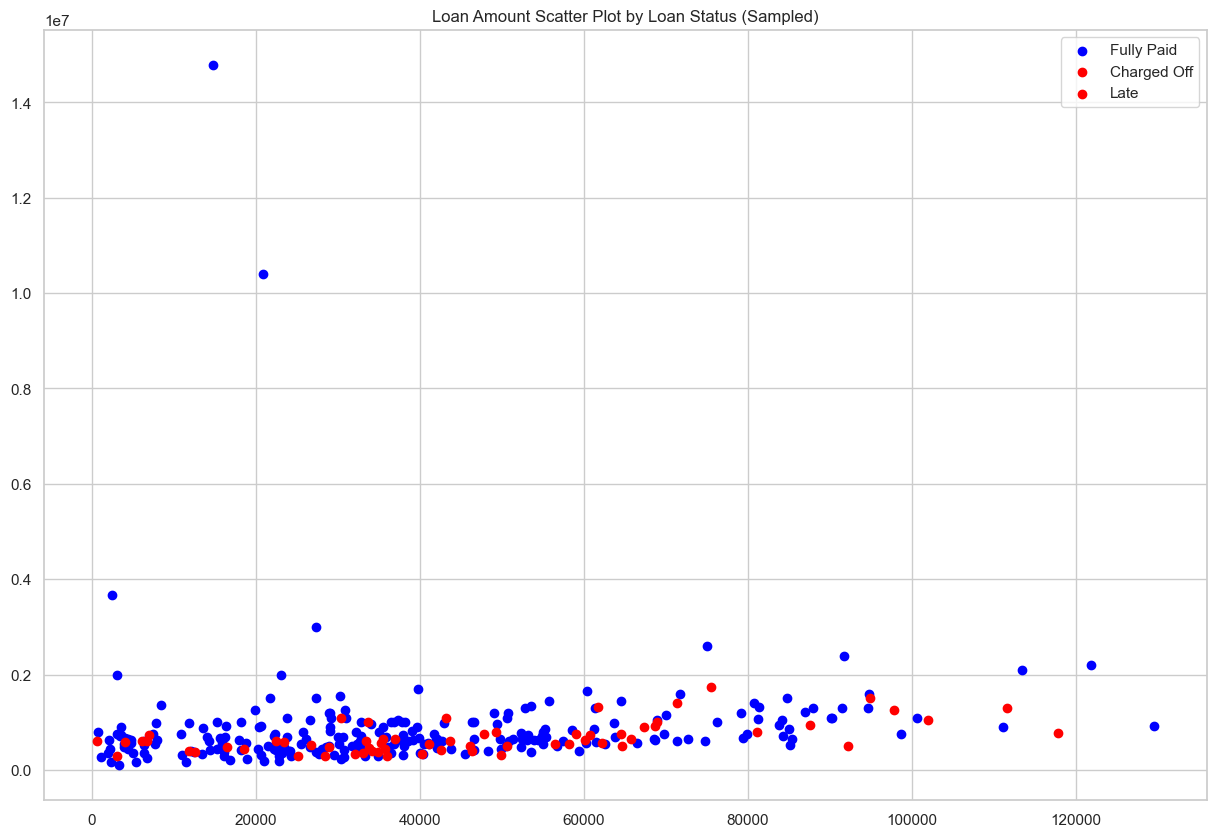

       annual_inc installment
700463     570000      6709.0
302930     700000      1237.0
139446     300000     36038.0
43836      750000     36133.0
20912      600000      6419.0
...           ...         ...
444202     600000     57979.0
718195     400000     46391.0
653320     450000     28129.0
784276     380000     32121.0
692547     570000     67318.0

[1000 rows x 2 columns]


In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# 예시 데이터프레임 생성
df = pd.DataFrame(loan)

# 데이터 샘플링
sampled_df = df.sample(n=1000)  # 예시로 2000개의 데이터를 선택

# 산포도 그리기
fig, ax = plt.subplots(figsize=(15, 10))

# loan_status에 따라 다른 색상 부여
colors = {'Fully Paid': 'blue', 'Charged Off': 'red', 'Late': 'red'}  # Late도 red로 변경
# colors = { 'Charged Off': 'red', 'Late': 'red'}  # Late도 red로 변경
for status, color in colors.items():
    subset = sampled_df[sampled_df['loan_status'] == status]
    ax.scatter(subset['installment'], subset['annual_inc'], label=status, color=color)  # x축과 y축 데이터를 바꿈

plt.legend()
plt.title('Loan Amount Scatter Plot by Loan Status (Sampled)')

# 눈금 설정
# ax.xaxis.set_major_locator(ticker.MultipleLocator(10000))   # x축 눈금 간격 설정
# ax.yaxis.set_major_locator(ticker.MultipleLocator(10000))  # y축 눈금 간격 설정

# # x축 눈금 레이블 세로로 표시
# plt.xticks(rotation=90, ha='center')

plt.show()
print(sampled_df[['annual_inc', 'installment']])


In [43]:
# loan_amnt: 대출 금액입니다.
# int_rate: 대출 이자율입니다.
# annual_inc: 고객의 연간 소득입니다.

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


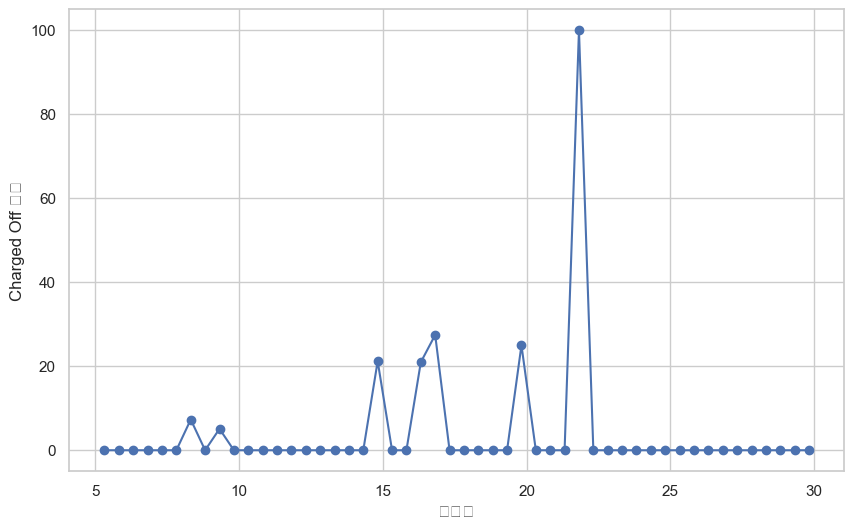

In [44]:
import numpy as np
import matplotlib.pyplot as plt

# int_rate 범위 설정
int_rate_ticks = np.arange(loan['int_rate'].min(), loan['int_rate'].max() + 1, 0.5)

# 'int_rate' 별 'Charged Off' 상태 비율 계산
charged_off_percentages = []
for rate in int_rate_ticks:
    filtered_by_rate = loan[loan['int_rate'] == rate]
    charged_off_count = filtered_by_rate[filtered_by_rate['loan_status'] == 'Charged Off'].shape[0]
    total_count = filtered_by_rate.shape[0]
    charged_off_percentages.append((charged_off_count / total_count) * 100 if total_count != 0 else 0)

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(int_rate_ticks, charged_off_percentages, marker='o')
plt.xlabel('이자율')
plt.ylabel('Charged Off 비율')
# plt.title('이자율에 따른 Charged Off 비율')
plt.grid(True)

plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50529 (\N{HANGUL SYLLABLE AEG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50640 (\N{HANGUL SYLLABLE E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\L

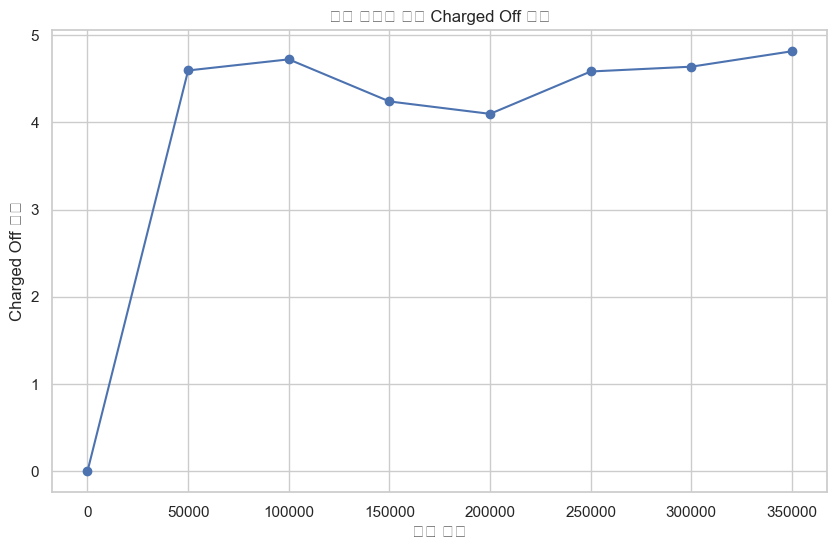

In [45]:
import numpy as np
import matplotlib.pyplot as plt

# loan_amnt 범위 설정
loan_amnt_ticks = np.arange(0, loan['loan_amnt'].max() + 1, 50000)

# 'loan_amnt' 별 'Charged Off' 상태 비율 계산
charged_off_percentages = []
for amount in loan_amnt_ticks:
    filtered_by_amount = loan[loan['loan_amnt'] == amount]
    charged_off_count = filtered_by_amount[filtered_by_amount['loan_status'] == 'Charged Off'].shape[0]
    total_count = filtered_by_amount.shape[0]
    charged_off_percentages.append((charged_off_count / total_count) * 100 if total_count != 0 else 0)

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(loan_amnt_ticks, charged_off_percentages, marker='o')
plt.xlabel('대출 금액')
plt.ylabel('Charged Off 비율')
plt.title('대출 금액에 따른 Charged Off 비율')
plt.grid(True)

plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 46301 (\N{HANGUL SYLLABLE DEUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54616 (\N{HANGUL SYLLABLE HA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\

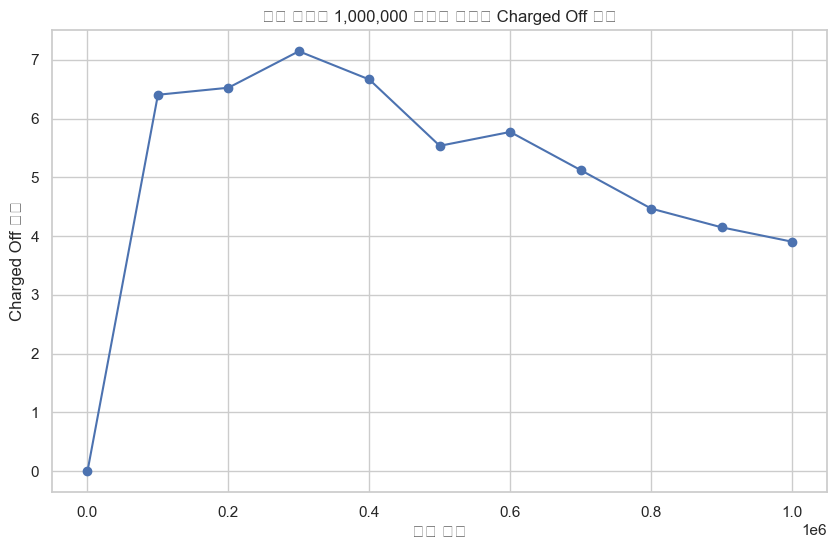

In [46]:
import numpy as np
import matplotlib.pyplot as plt

# annual_inc 범위 설정
annual_inc_ticks = np.arange(0, 1000001, 100000)

# 'annual_inc'가 1,000,000 이하인 데이터 필터링
filtered_by_income = loan[loan['annual_inc'] <= 1000000]

# 'annual_inc' 별 'Charged Off' 상태 비율 계산
charged_off_percentages = []
for income in annual_inc_ticks:
    filtered_by_income = loan[loan['annual_inc'] == income]
    charged_off_count = filtered_by_income[filtered_by_income['loan_status'] == 'Charged Off'].shape[0]
    total_count = filtered_by_income.shape[0]
    charged_off_percentages.append((charged_off_count / total_count) * 100 if total_count != 0 else 0)

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(annual_inc_ticks, charged_off_percentages, marker='o')
plt.xlabel('연간 소득')
plt.ylabel('Charged Off 비율')
plt.title('연간 소득이 1,000,000 이하인 경우의 Charged Off 비율')
plt.grid(True)

plt.show()


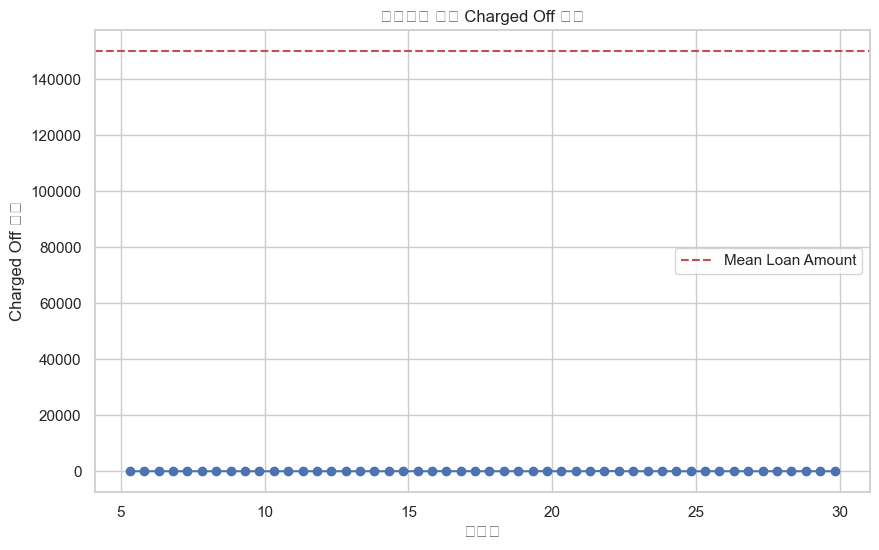

In [47]:
import numpy as np
import matplotlib.pyplot as plt

# int_rate 범위 설정
int_rate_ticks = np.arange(loan['int_rate'].min(), loan['int_rate'].max() + 1, 0.5)

# 'int_rate' 별 'Charged Off' 상태 비율 계산
charged_off_percentages = []
for rate in int_rate_ticks:
    filtered_by_rate = loan[loan['int_rate'] == rate]
    charged_off_count = filtered_by_rate[filtered_by_rate['loan_status'] == 'Charged Off'].shape[0]
    total_count = filtered_by_rate.shape[0]
    charged_off_percentages.append((charged_off_count / total_count) * 100 if total_count != 0 else 0)

# loan_amnt의 평균 계산
mean_loan_amnt = loan['loan_amnt'].mean()

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(int_rate_ticks, charged_off_percentages, marker='o')
plt.axhline(y=mean_loan_amnt, color='r', linestyle='--', label='Mean Loan Amount')
plt.xlabel('이자율')
plt.ylabel('Charged Off 비율')
plt.title('이자율에 따른 Charged Off 비율')
plt.legend()
plt.grid(True)

plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54624 (\N{HANGUL SYLLABLE HAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48512 (\N{HANGUL SYLLABLE BU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


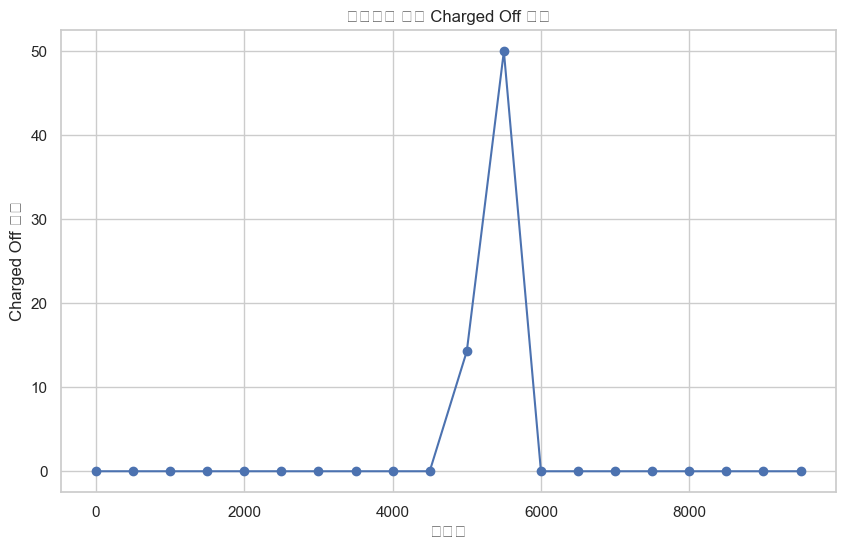

In [48]:
import numpy as np
import matplotlib.pyplot as plt

# installment 범위 설정
installment_ticks = np.arange(0, 10000, 500)

# 'installment' 별 'Charged Off' 상태 비율 계산
charged_off_percentages = []
for installment in installment_ticks:
    filtered_by_installment = loan[loan['installment'] == installment]
    charged_off_count = filtered_by_installment[filtered_by_installment['loan_status'] == 'Charged Off'].shape[0]
    total_count = filtered_by_installment.shape[0]
    charged_off_percentages.append((charged_off_count / total_count) * 100 if total_count != 0 else 0)

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(installment_ticks, charged_off_percentages, marker='o')
plt.xlabel('할부금')
plt.ylabel('Charged Off 비율')
plt.title('할부금에 따른 Charged Off 비율')
plt.grid(True)

plt.show()


In [49]:


# 조건에 해당하는 데이터 선택
filtered_data = loan[(loan['int_rate'] > 15) & 
                          (loan['loan_status'] == 'Charged Off') & 
                          (loan['annual_inc'] <= 400000)]
filtered_data['loan_amnt'].mean()
loan['loan_amnt'].mean()


qwe = loan[loan['loan_status'] == 'Charged Off']
qwe['loan_amnt'].mean()

147909.2249073664

In [50]:
help1 = pd.read_csv('./datasets/help1.csv')
help2 = pd.read_csv('./datasets/help2.csv')

In [51]:
help1
# 원하는 열만 선택하여 새로운 데이터프레임 생성
help1 = help1[['Training Program Name', 'Total Cost', 'Length\n(weeks)', 'Training Program State\n(if different from Provider Location)']]

# 새로운 데이터프레임 확인
help1.isna().sum()
help1 = help1.dropna()
help1.rename(columns={'Training Program Name': 'Program Name',
                      'Total Cost': 'Cost',
                      'Length\n(weeks)': 'studyLength',
                      'Training Program State\n(if different from Provider Location)': 'city'},
             inplace=True)
help1['Cost'] = help1['Cost'].str.replace('$', '')


# 결측값이 모두 제거된 새로운 데이터프레임 확인
help1



,Program Name,Cost,studyLength,city
0,CDL Testing,"5,543.00",4.0,Oregon
1,CDL Testing,"5,543.00",4.0,Oregon
2,CDL Testing,"5,543.00",4.0,Oregon
3,CDL Testing,"5,543.00",4.0,Oregon
4,Program 301,"5,543.00",4.0,Oregon
...,...,...,...,...
1164,Medical Assistant,"3,697.00",25.0,MD
1165,Medical Coding and Billing Specialist,"4,384.00",37.0,CO
1166,Personal Care Assistant - Caregiver,"2,514.00",4.0,MD
1167,Pharmacy Technician,"3,399.00",20.0,MD


In [52]:
help2

help2 = help2[['Program Name', 'Required Cost:\nTuition & Fees', 'Length:\nWeeks', 'Campus State']]

# 새로운 데이터프레임 확인
help2.isna().sum()
help2 = help2.dropna()
help2.rename(columns={'Program Name': 'Program Name',
                      'Required Cost:\nTuition & Fees': 'Cost',
                      'Length:\nWeeks': 'studyLength',
                      'Campus State': 'city'},
             inplace=True)
# 결측값이 모두 제거된 새로운 데이터프레임 확인
help2


,Program Name,Cost,studyLength,city
0,Home Builders Institute Pre-Apprentice Certifi...,5600,13,TX
1,Nationa Council for Construction Engineering R...,5600,13,TX
2,Nurse Aide,4300,6,TX
3,Cyber Security CyberBuild,3500,12,TX
4,Commercial Truck Driver,5500,4,Tx
...,...,...,...,...
6255,Certified Nursing Assistant,1450,6,TX
6256,Teacher,14400,56,TX
6257,Principal,5750,56,TX
6258,Digital Accessibility Developer,18150,12,CA


In [53]:
# Cost 열에서 값이 100 이하인 행만 선택하여 새로운 데이터프레임 생성
help2_cost_under_100 = help2[help2['Cost'] <= 0]

# 결과 확인
help2_cost_under_100

,Program Name,Cost,studyLength,city
558,Professional Truck Driving,0,0,TX
795,Medical Office AAS Degree,0,0,TX
802,Medical Office Specialist Certificate Level 2,0,30,TX
944,Combined Medical Assistant and Phlebotomy Program,0,0,TX
945,PharmacyTechnician Program,0,0,TX
...,...,...,...,...
6250,Wireperson,0,208,TX
6251,Line Maintainer (High Voltage electrician),0,208,TX
6252,McCarthy Building Companies Inc,0,104,TX
6253,CJR Renewables,0,130,TX


In [57]:
help_cost_0 = help2[help2['Cost'] <= 0]

# 결과 확인
help_cost_0

,Program Name,Cost,studyLength,city
558,Professional Truck Driving,0,0,TX
795,Medical Office AAS Degree,0,0,TX
802,Medical Office Specialist Certificate Level 2,0,30,TX
944,Combined Medical Assistant and Phlebotomy Program,0,0,TX
945,PharmacyTechnician Program,0,0,TX
...,...,...,...,...
6250,Wireperson,0,208,TX
6251,Line Maintainer (High Voltage electrician),0,208,TX
6252,McCarthy Building Companies Inc,0,104,TX
6253,CJR Renewables,0,130,TX


In [ ]:
# help1['Cost'] = help1['Cost'].astype(str).str.replace(',', '').astype(float).astype(int)
# # 'ERROR' 값을 NaN으로 대체
# help1['studyLength'] = pd.to_numeric(help1['studyLength'], errors='coerce')

# # NaN 값을 가진 행 삭제
# help1 = help1.dropna(subset=['studyLength'])

# # NaN 값을 가진 행 삭제한 후에는 다시 int로 변환
# help1['studyLength'] = help1['studyLength'].astype(int)

# help2['studyLength'] = pd.to_numeric(help2['studyLength'], errors='coerce')
# help2 = help2.dropna(subset=['studyLength'])

# # 'studyLength' 열을 int로 변환
# help2['studyLength'] = help2['studyLength'].astype(int)

# # 결과 확인
# print(help2['studyLength'])

In [ ]:
# help1.info()
# help2.info()

In [ ]:
help = help1 + help2
help.isna().sum()